In [1]:
# Instalação do pandas
# !pip install pandas

# Instalação do matplotlib
# !pip install matplotlib

# Instalação do scikit-learn
# !pip install -U scikit-learn

In [2]:
# Importação do pandas
import pandas as pd

# Importação do matplotlib
import matplotlib.pyplot as plt

# Importação da numpy
import numpy as np

In [45]:
# Ver apenas as 5 primeiras linhas
# Comparar com o dicionário de dados
path = 'microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    nrows=5, # número de linhas do arquivo a serem lidas
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
)
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [46]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [12]:
# Carregar para a memória apenas a coluna TP_SEXO
path = 'microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=['TP_SEXO']
)

In [13]:
# Verificar a memória usada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 1 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   TP_SEXO  object
dtypes: object(1)
memory usage: 25.9+ MB


In [16]:
# Quantos inscritos do sexo masculino?
# Quantos inscritos do sexo feminino?
df['TP_SEXO'].value_counts()

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [18]:
# Qual porcentagem de inscritos do sexo masculino?
# Qual porcentagem inscritos do sexo feminino?
df['TP_SEXO'].value_counts(normalize=True)

F    0.616705
M    0.383295
Name: TP_SEXO, dtype: float64

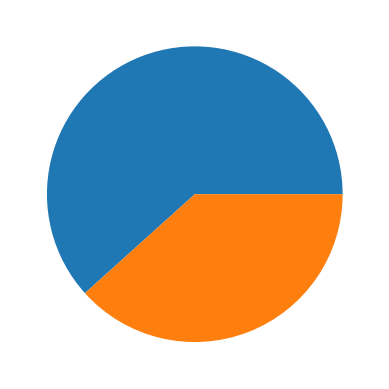

In [23]:
# Fazer gráfico simples de pizza de inscritos por sexo

## Calculando porcentagens
df_temp = df['TP_SEXO'].value_counts(normalize=True)
percent_F = df_temp['F']
percent_M = df_temp['M']

## Valores (x) para o gráfico
x = [percent_F, percent_M]

## Criando o gráfico
plt.pie(x)

## Mostrando o gráfico
plt.show()

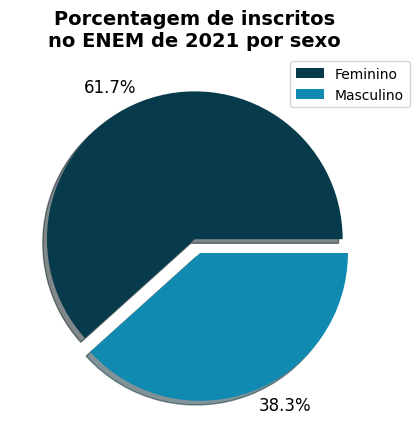

In [24]:
# Fazer gráfico completo de pizza de inscritos por sexo

## Criando o gráfico com mais propriedades
plt.pie(x,                                            # Valores
    labels=["{:.1f}%".format(100*percent_F),          # Rótulo do 1º setor
            "{:.1f}%".format(100*percent_M)],         # Rótulo do 2º setor
    colors=["#073B4C", "#118AB2"],                    # Cores respectivas dos setores
    shadow=True,                                      # Sombra no gráfico
    explode=[0,0.1],                                  # Destacando o 2º setor
    textprops={                                       # Propriedades do texto dos rótulos
        "fontsize":12                                 # Fonte de tamanho 12
    }
)

## Propriedades gerais

## Título
plt.title(
    "Porcentagem de inscritos\nno ENEM de 2021 por sexo", # Texto
    fontsize=14,                                          # Fonte de tamanho 14
    fontweight='bold'                                     # Fonte em negrito
)
## Legenda
plt.legend(
    ["Feminino", "Masculino"],                         # Texto
    bbox_to_anchor=(0.6, 0, 0.5, 1),                   # Posição da legenda
    prop={                                             # Outras propriedades 
        "size": 'medium',                              # Fonte de tamanho médio
    }
)

## Mostrando o gráfico
plt.show()

In [25]:
# Carregar para a memória apenas a coluna TP_COR_RACA
path = 'microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=['TP_COR_RACA']
)

In [26]:
# Verificar a memória usada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 1 columns):
 #   Column       Dtype
---  ------       -----
 0   TP_COR_RACA  int64
dtypes: int64(1)
memory usage: 25.9 MB


In [36]:
df_temp = df['TP_COR_RACA'].value_counts(normalize=True)
df_temp.index = ['Parda', 'Branca', 'Preta', 'Não declarado', 'Amarela', 'Indígena', 'Não informado']
df_temp

Parda            0.429949
Branca           0.401865
Preta            0.121334
Não declarado    0.020989
Amarela          0.020205
Indígena         0.005657
Não informado    0.000001
Name: TP_COR_RACA, dtype: float64

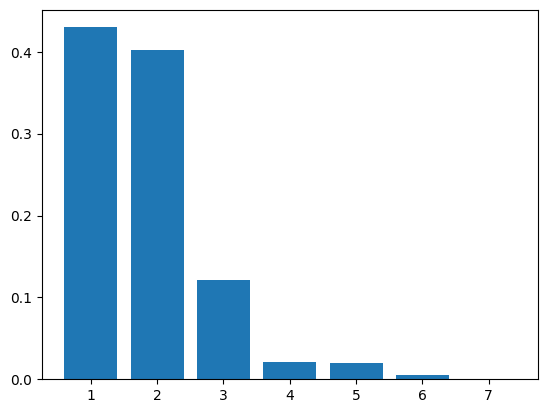

In [37]:
# Fazer gráfico simples de barras de inscritos por cor/raça

x = [1, 2, 3, 4, 5, 6, 7] # posições no eixo x das barras
heights = df_temp.values

## Criando o gráfico
plt.bar(x, heights)

## Mostrando o gráfico
plt.show()

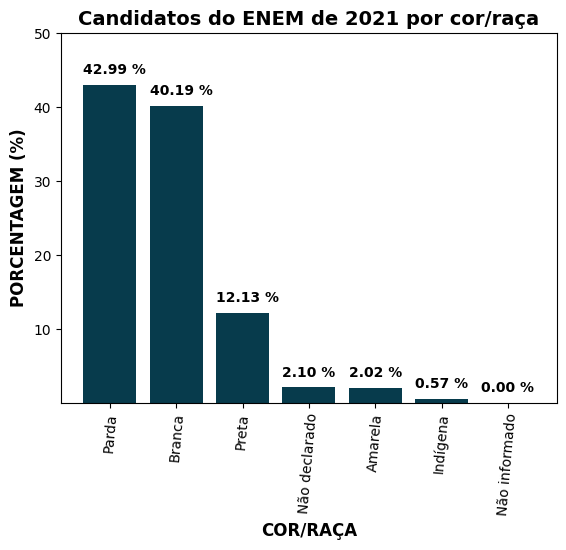

In [44]:
# Fazer gráfico completo de barras de inscritos por cor/raça

# Criando o gráfico
plt.bar(x, heights,
    color=7*["#073B4C"],                  # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2021 por cor/raça", # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "COR/RAÇA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [0.1, 0.2, 0.3, 0.4, 0.5]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.02,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold'                          # fonte em negrito
    )

# Mostrando o gráfico
plt.show()

In [64]:
# Faça um gráfico de linha da nota por idade de 17 a 25 anos

# Carregar para a memória apenas a coluna TP_COR_RACA
path = 'microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=['TP_FAIXA_ETARIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
)

In [65]:
# verificando a memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_FAIXA_ETARIA  int64  
 1   NU_NOTA_CN       float64
 2   NU_NOTA_CH       float64
 3   NU_NOTA_LC       float64
 4   NU_NOTA_MT       float64
 5   NU_NOTA_REDACAO  float64
dtypes: float64(5), int64(1)
memory usage: 155.2 MB


In [66]:
# Filtrar com apenas faixas etárias permitidas
df = df[(df['TP_FAIXA_ETARIA']<=10) & (df['TP_FAIXA_ETARIA']>=2)] 

# Converter categoria numérica para categoria textual
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].map(lambda x: x + 15)
df['TP_FAIXA_ETARIA'].value_counts()

18    699365
17    620784
19    394689
20    250690
21    177086
22    132052
23    100580
24     85742
25     71199
Name: TP_FAIXA_ETARIA, dtype: int64

In [67]:
# Criar a coluna de nota final fazendo a média das notas em cada competência mais a redação
df['NOTA_FINAL'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + \
                   df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + \
                   + df['NU_NOTA_REDACAO'] ) / 5

In [68]:
df.groupby('TP_FAIXA_ETARIA').mean()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
TP_FAIXA_ETARIA,,,,,,
17,490.598119,519.189151,506.058168,542.949814,628.038896,539.679509
18,488.217998,515.447035,500.993215,534.143681,619.888449,534.656582
19,492.405536,517.233956,501.716466,535.533739,625.681229,537.936266
20,496.570239,520.676928,502.838833,537.274448,628.429567,540.684016
21,499.790603,524.321456,504.730200,538.970722,625.767437,542.432048
22,500.002288,526.449168,505.058508,537.740206,620.395309,541.665885
23,500.098460,527.787844,505.597962,535.352053,609.749329,539.373731
24,498.899530,527.953282,504.648413,531.913273,600.200786,536.453362
25,498.995887,528.579738,504.605609,529.443792,592.329386,534.589109


In [69]:
df_group = df.groupby('TP_FAIXA_ETARIA').mean()
df_group['NOTA_FINAL']

TP_FAIXA_ETARIA
17    539.679509
18    534.656582
19    537.936266
20    540.684016
21    542.432048
22    541.665885
23    539.373731
24    536.453362
25    534.589109
Name: NOTA_FINAL, dtype: float64

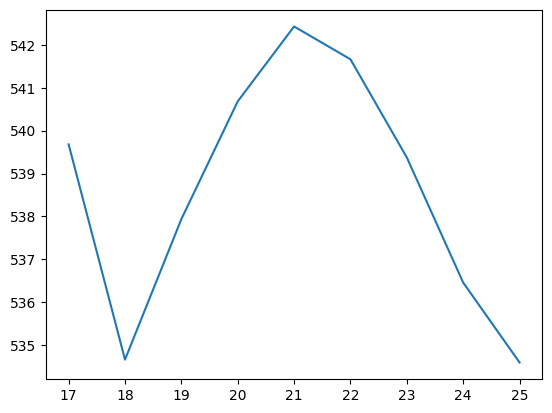

In [70]:
# Definindo x e y
x = df_group['NOTA_FINAL'].index
y = df_group['NOTA_FINAL'].values

# Criando o gráfico
plt.plot(x, y)

# Mostrando o gráfico
plt.show()

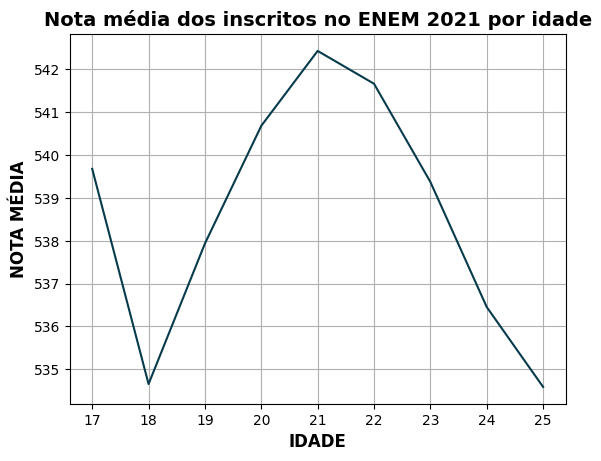

In [71]:
# Criando o gráfico
plt.plot(x, y,
    color="#073b4c", # Cor
)

# Propriedades gerais

## Título
plt.title(
    "Nota média dos inscritos no ENEM 2021 por idade", # Texto
    fontsize=14,                                       # Fonte de tamanho 14
    fontweight='bold'                                  # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "IDADE",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "NOTA MÉDIA",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Grade
plt.grid('on')

# Mostrando o gráfico
plt.show()

In [97]:
# Faça um Boxplot apresentando a nota em Linguagens e código em relação a nota em redação

path = 'microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=['NU_NOTA_COMP1', 'NU_NOTA_LC']
)

In [75]:
sorted(df['NU_NOTA_COMP1'].unique())

[0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, nan, 160.0, 180.0, 200.0]

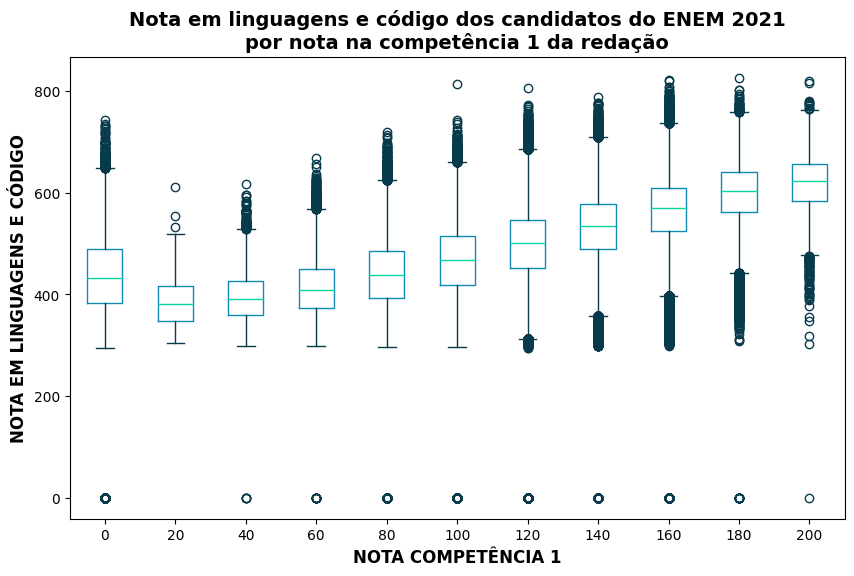

In [88]:
# Dessa fez vamos precisar de um gráfico maior
plt.figure(figsize=(10,6))

# Notas totais (x) dos candidatos cuja renda familiar é inferior a R$998,00
xs = dict()
for grade in range(0,201,20):
    xs[grade] = df[df['NU_NOTA_COMP1'] == grade]['NU_NOTA_LC'].values
    
xs_values = xs.values()
xs_ticks = xs.keys()

# Criando o gráfico
plt.boxplot(xs_values,
    boxprops=dict(color="#118AB2"),                               # Caixa
    capprops=dict(color="#073B4C"),                               # Linha horizontal
    whiskerprops=dict(color="#073B4C"),                           # Linha vertical
    flierprops=dict(color="#118AB2", markeredgecolor="#073B4C"),  # Outliers
    medianprops=dict(color="#06D6A0"),                            # Mediana
)

# Propriedades gerais
## Título
plt.title(
    "Nota em linguagens e código dos candidatos do ENEM 2021\npor nota na competência 1 da redação", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "NOTA COMPETÊNCIA 1", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

## Marcações do eixo horizontal
plt.xticks(
    list(range(1,len(xs)+1)), 
    xs.keys(),
    fontsize=10)


## Rótulo do eixo vertical
plt.ylabel(
    "NOTA EM LINGUAGENS E CÓDIGO", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

plt.show()

In [6]:
# Gráfico de dispersão da nota em linguagens e códigos e nota em Matemática

path = 'microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=['NU_NOTA_MT', 'NU_NOTA_LC']
)
df = df.dropna()

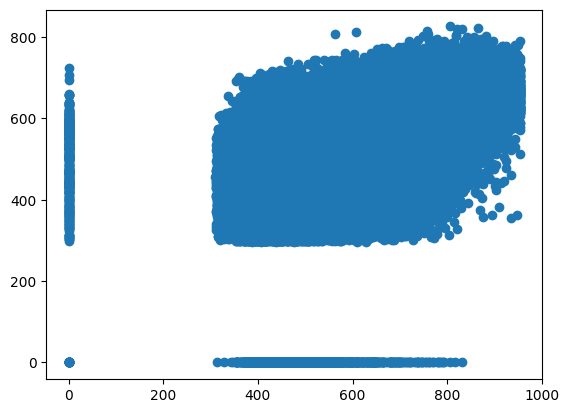

In [7]:
plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_LC'])
plt.show()

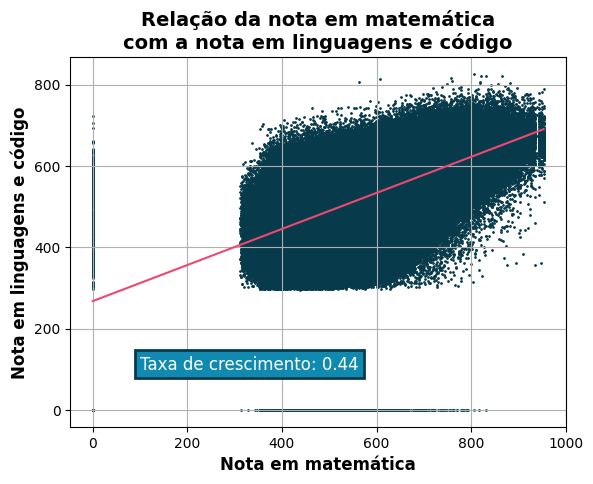

In [13]:
x, y = df['NU_NOTA_MT'], df['NU_NOTA_LC']

# Regressão Linear
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.values.reshape(-1, 1), y)

x_min = df['NU_NOTA_MT'].min()
y_min = model.intercept_ + model.coef_ * x_min
x_max = df['NU_NOTA_MT'].max()
y_max = model.intercept_ + model.coef_ * x_max
 
# Criando o gráfico
plt.scatter(x, y,
    color="#073b4c",                # Cor
    s=1                             # Tamanho dos pontos
)

x_min = df['NU_NOTA_MT'].min()
y_min = model.intercept_ + model.coef_ * x_min
x_max = df['NU_NOTA_MT'].max()
y_max = model.intercept_ + model.coef_ * x_max

plt.plot([x_min, x_max], [y_min, y_max],
    color="#EF476F"        
)

# Propriedades gerais

## Título
plt.title(
    "Relação da nota em matemática\ncom a nota em linguagens e código", # Texto
    fontsize=14,                                                        # Fonte de tamanho 14
    fontweight='bold'                                                   # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "Nota em matemática",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "Nota em linguagens e código",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Anotações
plt.annotate(
    "Taxa de crescimento: {:.2f}".format(model.coef_[0]),  # Texto
    xy=(100,100),                                             # Posição
    size=12,                                                 # Fonte de tamanho 12
    color='w',                                               # Fonte de cor branca
    bbox=dict(                        # Formatação da caixa
        boxstyle="square,pad=0.3",              # Quadrada com espaço interno de 0.3
        fc="#118AB2",                           # Cor de fundo
        ec="#073B4C",                           # Cor de borda
        lw=2                                    # Espessura da borda
    )
)


## Grade
plt.grid('on')

# Mostrando o gráfico
plt.show()